In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x1, x2):
    y = 0.5 * np.sin(x1) + 0.5 * np.cos(x2) + 3 + 0.1 * x1 
    return y

def load_data():
    x1_train = np.linspace(0,50,500)
    x2_train = np.linspace(-10,10,500)
    data_train = np.array([[x1,x2,f(x1,x2) + (np.random.random(1)-0.5)] for x1,x2 in zip(x1_train, x2_train)])
    x1_test = np.linspace(0,50,100)+ 0.5 * np.random.random(100)
    x2_test = np.linspace(-10,10,100) + 0.02 * np.random.random(100)
    data_test = np.array([[x1,x2,f(x1,x2)] for x1,x2 in zip(x1_test, x2_test)])
    return data_train, data_test

train, test = load_data()
x_train, y_train = train[:,:2], train[:,2] #数据前两列是x1,x2 第三列是y,这里的y有随机噪声
x_test ,y_test = test[:,:2], test[:,2] # 同上,不过这里的y没有噪声

def try_different_method(clf):
    clf.fit(x_train,y_train)
    score = clf.score(x_test, y_test)
    result = clf.predict(x_test)
    plt.figure()
    plt.plot(np.arange(len(result)), y_test,'go-',label='true value')
    plt.plot(np.arange(len(result)),result,'ro-',label='predict value')
    plt.title('score: %f'%score)
    plt.legend()
    plt.show()

In [3]:
from sklearn import linear_model

linear_reg = linear_model.LinearRegression()


/Users/gaojian/.pyenv/versions/3.7.0/envs/py3/lib/python3.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


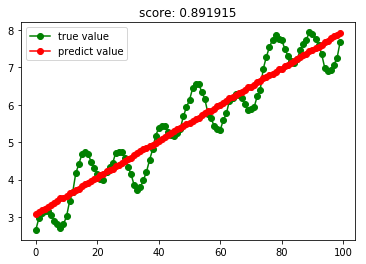

In [5]:

try_different_method(linear_reg)

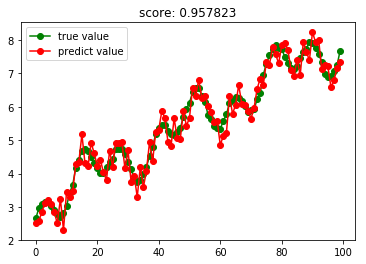

In [6]:
from sklearn import tree
tree_reg = tree.DecisionTreeRegressor()
try_different_method(tree_reg)

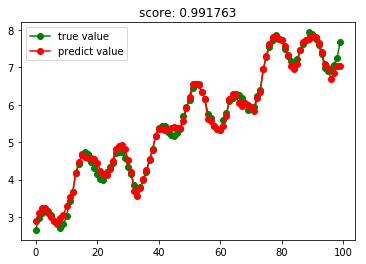

In [7]:
from sklearn import svm
svr = svm.SVR()
try_different_method(svr)

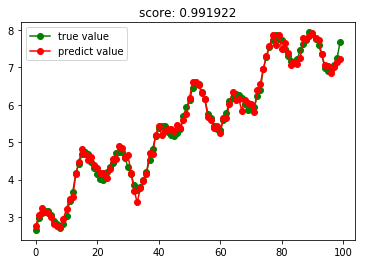

In [8]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor()
try_different_method(knn)

/Users/gaojian/.pyenv/versions/3.7.0/envs/py3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


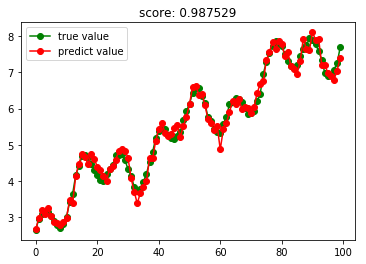

In [9]:
from sklearn import ensemble
rf =ensemble.RandomForestRegressor(n_estimators=20)#这里使用20个决策树
try_different_method(rf)

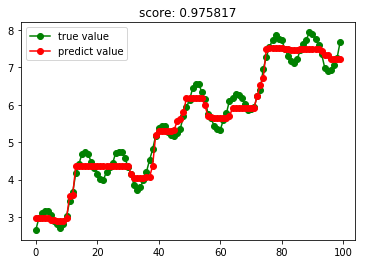

In [10]:
ada = ensemble.AdaBoostRegressor(n_estimators=50)
try_different_method(ada)

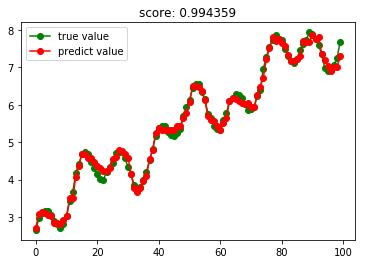

In [11]:
gbrt = ensemble.GradientBoostingRegressor(n_estimators=100)
try_different_method(gbrt)